In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r'C:\Users\admin\Downloads\archive\ncr_ride_bookings.csv')
df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI


In [3]:
df.shape

(150000, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [5]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [6]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [7]:
# Strip whitespace from object columns
for c in df.select_dtypes(include="object").columns:
    df[c] = df[c].astype(str).str.strip()

In [8]:
# Parse datetime
# Attempt standard parse; if too many NaT, retry with dayfirst=True
_dt = pd.to_datetime(df.get("Date", "") + " " + df.get("Time", ""), errors="coerce")
if _dt.isna().mean() > 0.5:
    _dt = pd.to_datetime(df.get("Date", ""), dayfirst=True, errors="coerce").astype(str) + " " + df.get("Time", "")
    _dt = pd.to_datetime(_dt, errors="coerce")

In [9]:
df["datetime"] = _dt

In [10]:
# Derive calendar/time features
df["date"] = df["datetime"].dt.date
df["hour"] = df["datetime"].dt.hour
df["dow"] = df["datetime"].dt.dayofweek # 0=Mon
df["dow_name"] = df["datetime"].dt.day_name()
df["month"] = df["datetime"].dt.month

In [11]:
# Normalize Booking Status to lowercase tokens
status = df.get("Booking Status", "").str.lower()
df["status_norm"] = status

In [12]:
# Outcomes
df["is_completed"] = (status == "completed").astype(int)
df["is_cancel_customer"] = (status == "cancelled by customer").astype(int)
df["is_cancel_driver"] = (status == "cancelled by driver").astype(int)
df["is_incomplete"] = (status == "incomplete").astype(int)

In [13]:
# Numeric columns (present in this dataset)
num_cols = [c for c in [
"Avg VTAT","Avg CTAT","Cancelled Rides by Customer","Cancelled Rides by Driver",
"Incomplete Rides","Booking Value","Ride Distance","Driver Ratings","Customer Rating"
] if c in df.columns]

In [14]:
# Convert numeric columns safely
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

In [15]:
print("\n===== MISSING VALUES (%) =====")
miss = df[num_cols].isna().mean().mul(100).round(2).sort_values(ascending=False)
print(miss)


===== MISSING VALUES (%) =====
Incomplete Rides               94.0
Cancelled Rides by Customer    93.0
Cancelled Rides by Driver      82.0
Driver Ratings                 38.0
Customer Rating                38.0
Avg CTAT                       32.0
Booking Value                  32.0
Ride Distance                  32.0
Avg VTAT                        7.0
dtype: float64


In [16]:
print("\n===== DESCRIPTIVE STATS (NUMERIC) =====")
print(df[num_cols].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).T)


===== DESCRIPTIVE STATS (NUMERIC) =====
                                count        mean         std   min     1%  \
Avg VTAT                     139500.0    8.456352    3.773564   2.0   2.20   
Avg CTAT                     102000.0   29.149636    8.902577  10.0  12.30   
Cancelled Rides by Customer   10500.0    1.000000    0.000000   1.0   1.00   
Cancelled Rides by Driver     27000.0    1.000000    0.000000   1.0   1.00   
Incomplete Rides               9000.0    1.000000    0.000000   1.0   1.00   
Booking Value                102000.0  508.295912  395.805774  50.0  58.99   
Ride Distance                102000.0   24.637012   14.002138   1.0   2.24   
Driver Ratings                93000.0    4.230992    0.436871   3.0   3.10   
Customer Rating               93000.0    4.404584    0.437819   3.0   3.10   

                                5%     25%     50%     75%      95%      99%  \
Avg VTAT                      2.90    5.30    8.30   11.30    14.60    18.00   
Avg CTAT          

In [17]:
print("\n===== KEY KPIs =====")
N = len(df)
completed_rate = df["is_completed"].mean()*100
cancel_cust_rate = df["is_cancel_customer"].mean()*100
cancel_driver_rate = df["is_cancel_driver"].mean()*100
incomplete_rate = df["is_incomplete"].mean()*100


===== KEY KPIs =====


In [18]:
avg_value = df["Booking Value"].mean()
median_value = df["Booking Value"].median()
avg_dist = df["Ride Distance"].mean()
median_dist = df["Ride Distance"].median()

In [19]:
avg_driver_rating = df["Driver Ratings"].mean()
avg_customer_rating = df["Customer Rating"].mean()

In [20]:
print({
"rows": N,
"completed_%": round(completed_rate,2),
"cancel_by_customer_%": round(cancel_cust_rate,2),
"cancel_by_driver_%": round(cancel_driver_rate,2),
"incomplete_%": round(incomplete_rate,2),
"avg_booking_value": round(avg_value,2) if pd.notna(avg_value) else None,
"median_booking_value": round(median_value,2) if pd.notna(median_value) else None,
"avg_ride_distance": round(avg_dist,2) if pd.notna(avg_dist) else None,
"median_ride_distance": round(median_dist,2) if pd.notna(median_dist) else None,
"avg_driver_rating": round(avg_driver_rating,2) if pd.notna(avg_driver_rating) else None,
"avg_customer_rating": round(avg_customer_rating,2) if pd.notna(avg_customer_rating) else None,
})

{'rows': 150000, 'completed_%': 62.0, 'cancel_by_customer_%': 7.0, 'cancel_by_driver_%': 18.0, 'incomplete_%': 6.0, 'avg_booking_value': 508.3, 'median_booking_value': 414.0, 'avg_ride_distance': 24.64, 'median_ride_distance': 23.72, 'avg_driver_rating': 4.23, 'avg_customer_rating': 4.4}


In [21]:
# Peak hour & day
hour_counts = df["hour"].value_counts().sort_index()
day_counts = df["dow_name"].value_counts()

In [22]:
peak_hour = int(hour_counts.idxmax()) if len(hour_counts) else None
peak_day = day_counts.idxmax() if len(day_counts) else None
print("Peak demand hour:", peak_hour)
print("Peak demand day:", peak_day)

Peak demand hour: 18
Peak demand day: Monday


In [23]:
# Top vehicle types & payment methods
if "Vehicle Type" in df.columns:
    print("\nTop Vehicle Types:")
    print(df["Vehicle Type"].value_counts().head(10))
if "Payment Method" in df.columns:
    print("\nPayment Methods Share:")
    print((df["Payment Method"].value_counts(normalize=True)*100).round(2).astype(str) + "%")


Top Vehicle Types:
Vehicle Type
Auto             37419
Go Mini          29806
Go Sedan         27141
Bike             22517
Premier Sedan    18111
eBike            10557
Uber XL           4449
Name: count, dtype: int64

Payment Methods Share:
Payment Method
nan             32.0%
UPI            30.61%
Cash           16.91%
Uber Wallet     8.18%
Credit Card     6.81%
Debit Card      5.49%
Name: proportion, dtype: object


In [24]:
# Top routes (Pickup -> Drop)
if set(["Pickup Location","Drop Location"]).issubset(df.columns):
    routes = (df["Pickup Location"].astype(str) + " → " + df["Drop Location"].astype(str)).value_counts().head(10)
    print("\nTop 10 Routes:")
    print(routes)


Top 10 Routes:
DLF City Court → Bhiwadi           17
Janakpuri → Faridabad Sector 15    16
Akshardham → RK Puram              16
Vatika Chowk → Rithala             15
Jor Bagh → Rohini East             15
Rithala → Udyog Vihar Phase 4      15
Ghaziabad → Badshahpur             15
Subhash Nagar → Basai Dhankot      14
South Extension → Gwal Pahari      14
Connaught Place → Paharganj        14
Name: count, dtype: int64


In [25]:
plt.rcParams.update({"figure.figsize": (8,4)})

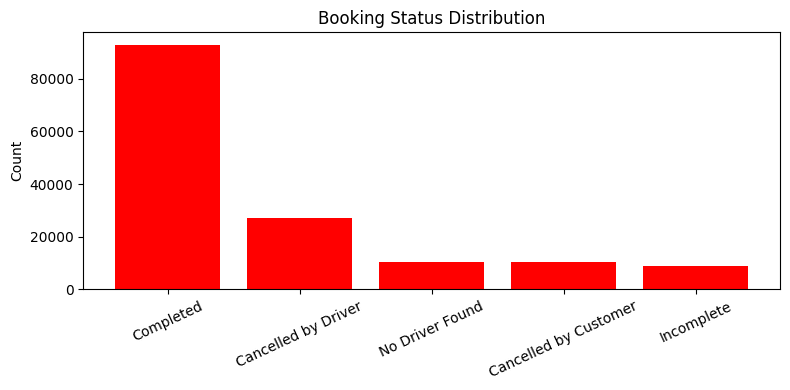

In [26]:
# Booking Status
if "Booking Status" in df.columns:
    counts = df["Booking Status"].value_counts()
    plt.figure()
    plt.bar(counts.index.astype(str), counts.values,color='r')
    plt.title("Booking Status Distribution")
    plt.xticks(rotation=25)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

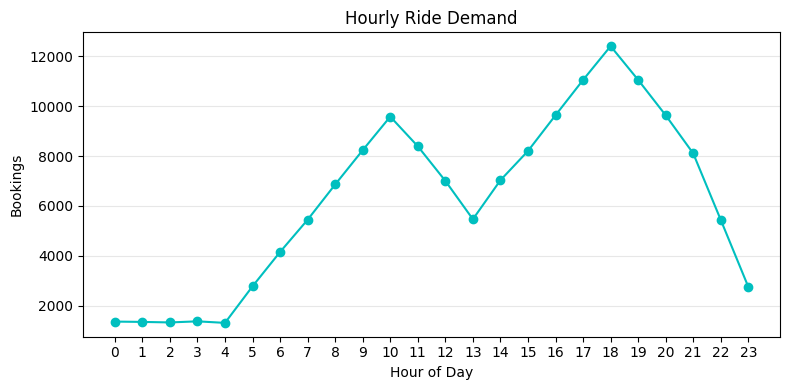

In [27]:
# Hourly Demand
if "hour" in df.columns:
    plt.figure()
    plt.plot(hour_counts.index, hour_counts.values, marker="o",color='c')
    plt.title("Hourly Ride Demand")
    plt.xlabel("Hour of Day")
    plt.ylabel("Bookings")
    plt.xticks(range(0,24))
    plt.grid(True, axis="y", alpha=.3)
    plt.tight_layout()
    plt.show()

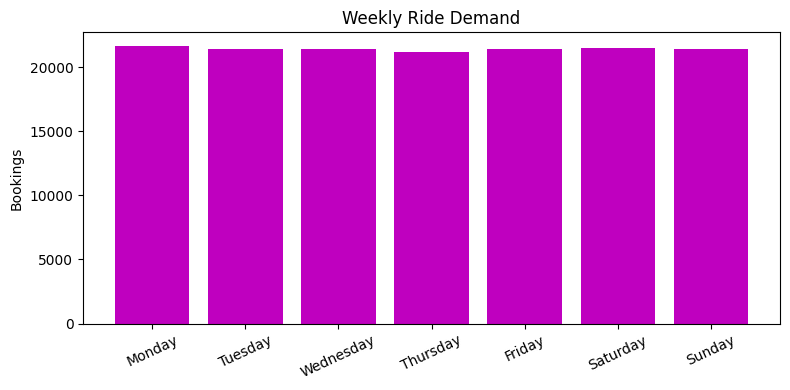

In [28]:
# Day-of-Week Demand
if "dow_name" in df.columns:
    order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    vals = df["dow_name"].value_counts().reindex(order)
    plt.figure()
    plt.bar(vals.index.astype(str), vals.values,color='m')
    plt.title("Weekly Ride Demand")
    plt.xticks(rotation=25)
    plt.ylabel("Bookings")
    plt.tight_layout()
    plt.show()

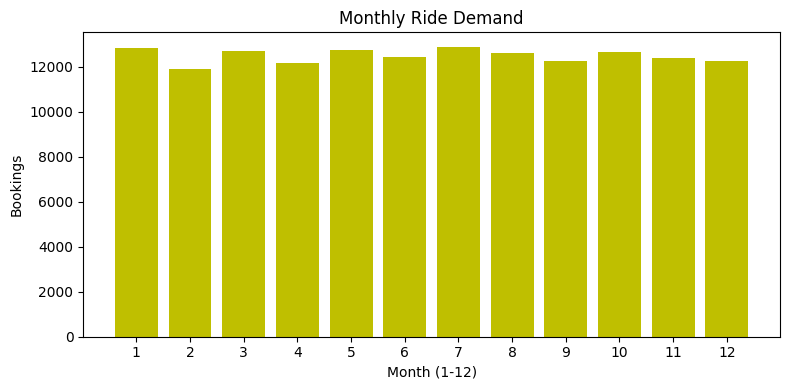

In [29]:
# Monthly Demand (if multiple months present)
if df["month"].nunique() > 1:
    mvals = df["month"].value_counts().sort_index()
    plt.figure()
    plt.bar(mvals.index.astype(str), mvals.values,color='y')
    plt.title("Monthly Ride Demand")
    plt.xlabel("Month (1-12)")
    plt.ylabel("Bookings")
    plt.tight_layout()
    plt.show()

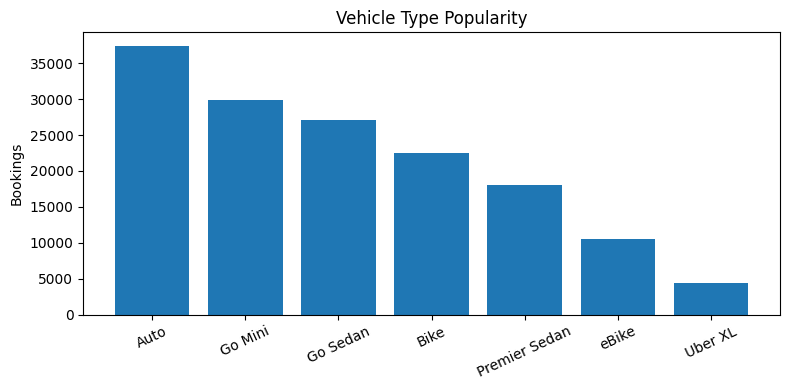

In [30]:
# Vehicle Type popularity
if "Vehicle Type" in df.columns:
    vc = df["Vehicle Type"].value_counts()
    plt.figure()
    plt.bar(vc.index.astype(str), vc.values)
    plt.title("Vehicle Type Popularity")
    plt.xticks(rotation=25)
    plt.ylabel("Bookings")
    plt.tight_layout()
    plt.show()

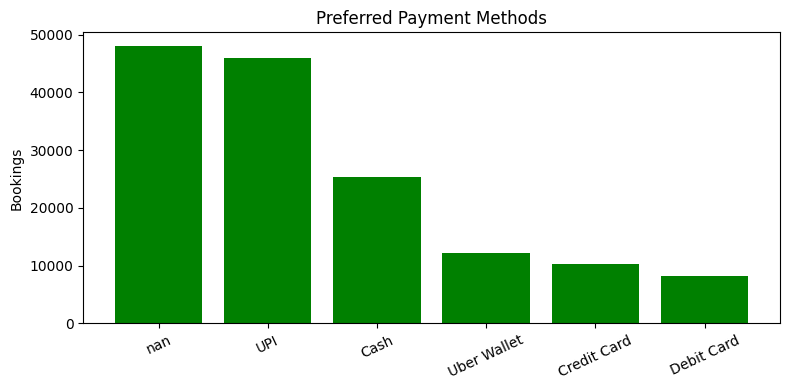

In [31]:
# Payment Method usage
if "Payment Method" in df.columns:
    pm = df["Payment Method"].value_counts()
    plt.figure()
    plt.bar(pm.index.astype(str), pm.values,color='g')
    plt.title("Preferred Payment Methods")
    plt.xticks(rotation=25)
    plt.ylabel("Bookings")
    plt.tight_layout()
    plt.show()

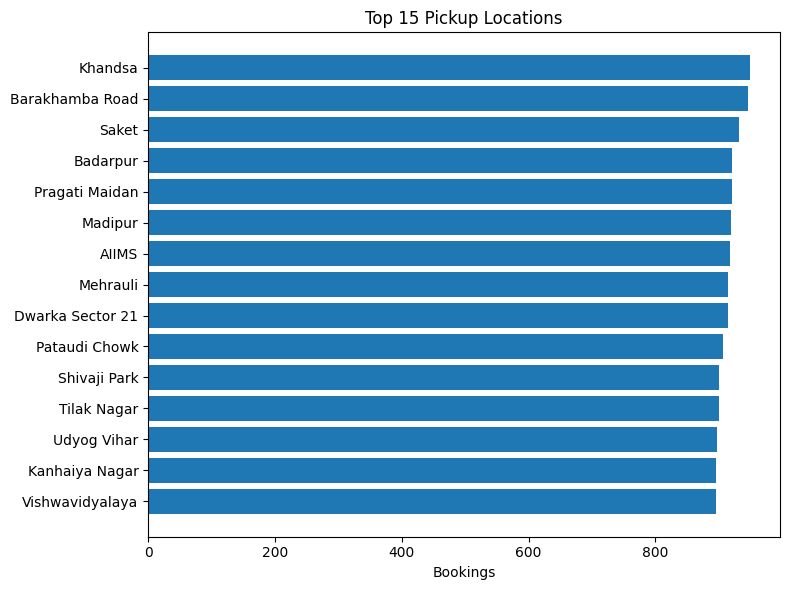

In [32]:
# Top 15 Pickup & Drop locations
if "Pickup Location" in df.columns:
    top_pick = df["Pickup Location"].value_counts().head(15)
    plt.figure(figsize=(8,6))
    plt.barh(top_pick.index[::-1].astype(str), top_pick.values[::-1])
    plt.title("Top 15 Pickup Locations")
    plt.xlabel("Bookings")
    plt.tight_layout()
    plt.show()

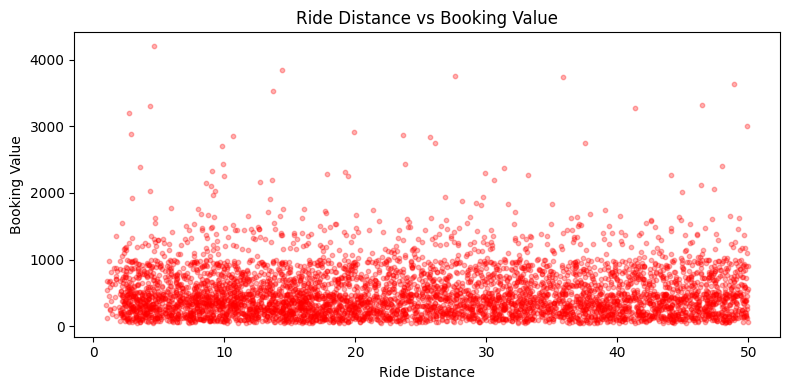

In [33]:
# Value vs Distance scatter
if set(["Ride Distance","Booking Value"]).issubset(df.columns):
    sample = df[["Ride Distance","Booking Value"]].dropna()
    if len(sample) > 5000:
        sample = sample.sample(5000, random_state=42)
    plt.figure()
    plt.scatter(sample["Ride Distance"], sample["Booking Value"], s=10, alpha=0.3,color='r')
    plt.title("Ride Distance vs Booking Value")
    plt.xlabel("Ride Distance")
    plt.ylabel("Booking Value")
    plt.tight_layout()
    plt.show()

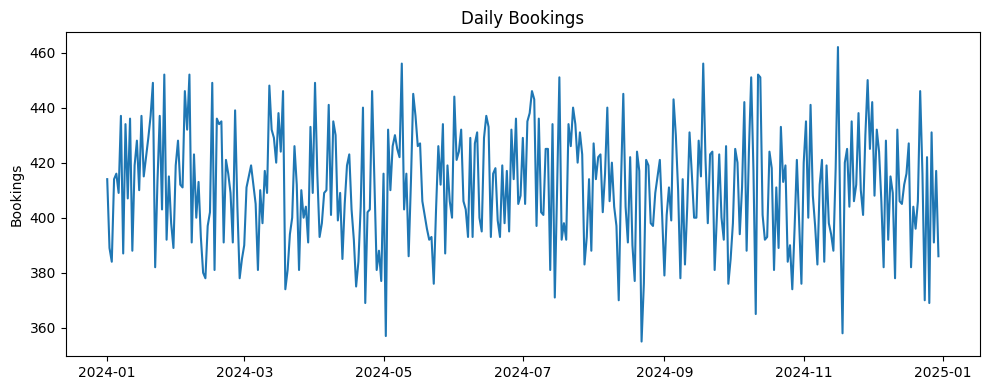

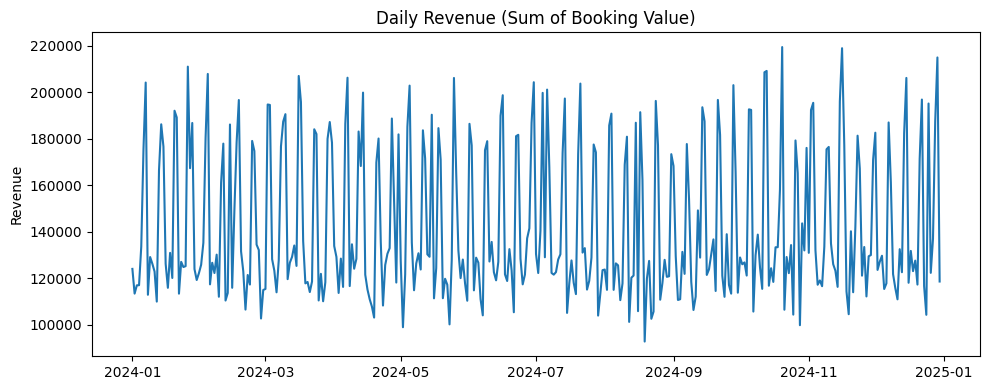

In [34]:
#  Daily trend: bookings & revenue
if "date" in df.columns:
    daily = df.groupby("date").agg(bookings=("Booking ID","count"), revenue=("Booking Value","sum"))
    daily = daily.fillna(0)
    # Bookings
    plt.figure(figsize=(10,4))
    plt.plot(pd.to_datetime(daily.index), daily["bookings"], marker="")
    plt.title("Daily Bookings")
    plt.ylabel("Bookings")
    plt.tight_layout()
    plt.show()
    # Revenue
    plt.figure(figsize=(10,4))
    plt.plot(pd.to_datetime(daily.index), daily["revenue"], marker="")
    plt.title("Daily Revenue (Sum of Booking Value)")
    plt.ylabel("Revenue")
    plt.tight_layout()
    plt.show()

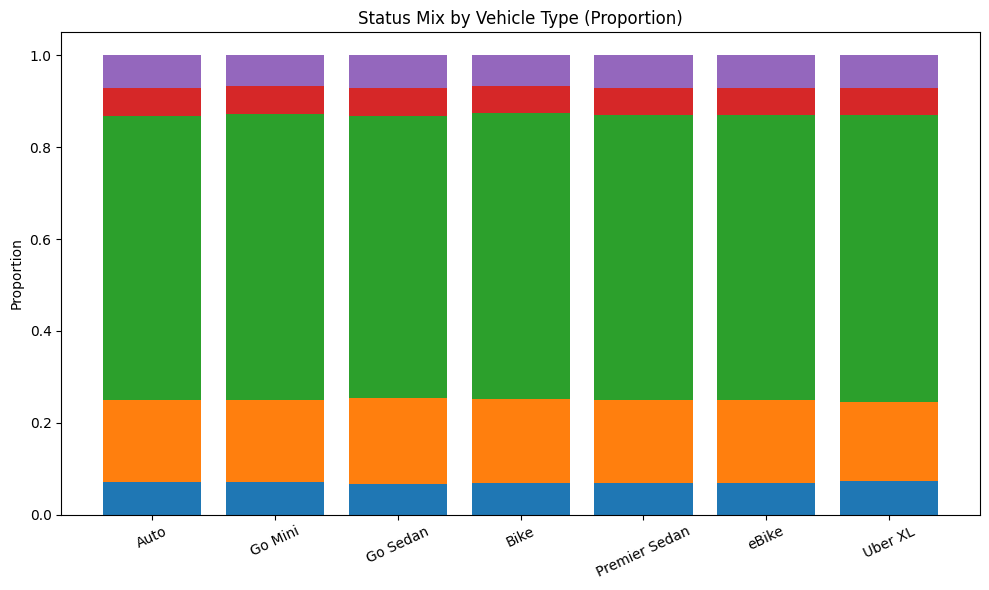

In [35]:
# Stacked status by Vehicle Type
if set(["Vehicle Type","status_norm"]).issubset(df.columns):
    pivot_v = pd.crosstab(df["Vehicle Type"], df["status_norm"]).sort_values("completed", ascending=False, axis=0) if "completed" in df["status_norm"].unique() else pd.crosstab(df["Vehicle Type"], df["status_norm"])
    pivot_v_pct = pivot_v.div(pivot_v.sum(axis=1), axis=0).fillna(0)
    plt.figure(figsize=(10,6))
    bottom = np.zeros(len(pivot_v_pct))
    for st in pivot_v_pct.columns:
        plt.bar(pivot_v_pct.index.astype(str), pivot_v_pct[st].values, bottom=bottom)
        bottom += pivot_v_pct[st].values
    plt.title("Status Mix by Vehicle Type (Proportion)")
    plt.xticks(rotation=25)
    plt.ylabel("Proportion")
    plt.tight_layout()
    plt.show()

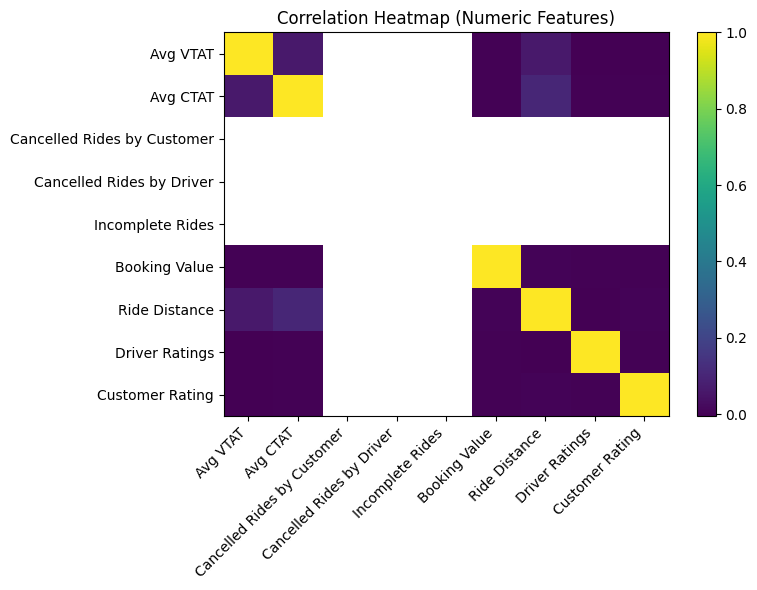

In [36]:
# Correlation heatmap (numeric)
if len(num_cols) > 1:
    corr = df[num_cols].corr(numeric_only=True)
    plt.figure(figsize=(8,6))
    plt.imshow(corr, aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
    plt.yticks(range(len(corr.index)), corr.index)
    plt.title("Correlation Heatmap (Numeric Features)")
    plt.tight_layout()
    plt.show()

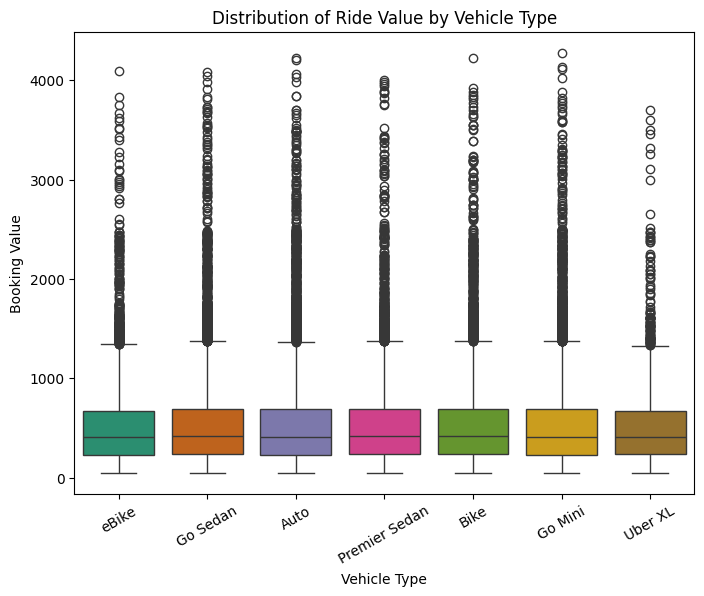

In [37]:
# Boxplot – Ride Value by Vehicle Type
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Vehicle Type", y="Booking Value", palette="Dark2")
plt.title("Distribution of Ride Value by Vehicle Type")
plt.xticks(rotation=30)
plt.show()

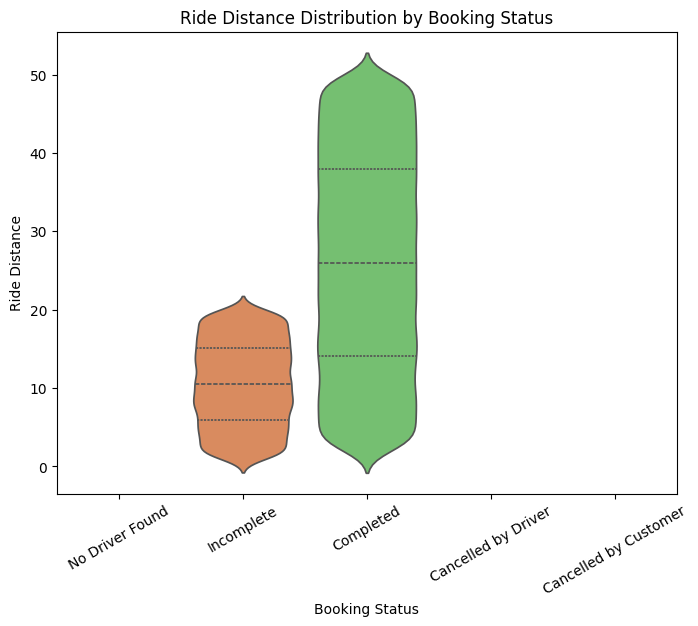

In [38]:
# Violin Plot – Ride Distance vs Booking Status
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x="Booking Status", y="Ride Distance", palette="muted", inner="quartile")
plt.title("Ride Distance Distribution by Booking Status")
plt.xticks(rotation=30)
plt.show()

<Figure size 1000x600 with 0 Axes>

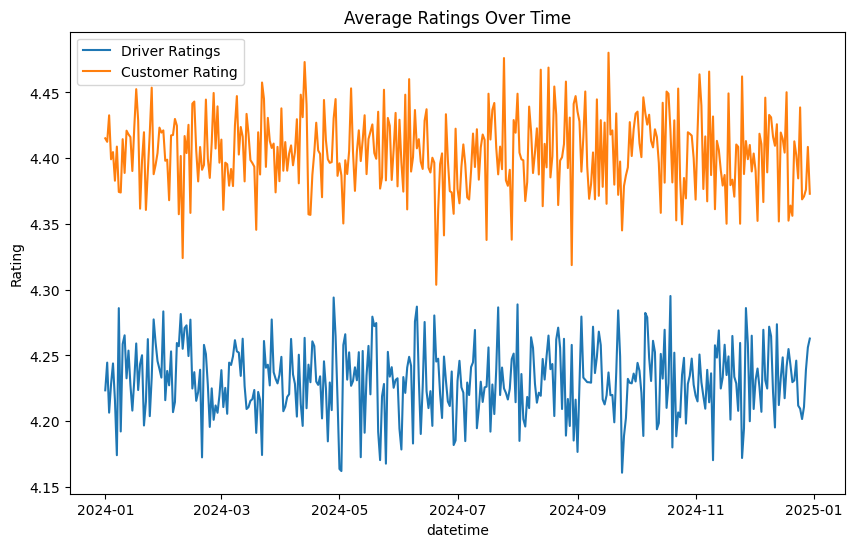

In [39]:
# Line Plot – Average Rating Over Time
plt.figure(figsize=(10,6))
df.groupby(df["datetime"].dt.date)[["Driver Ratings","Customer Rating"]].mean().plot(figsize=(10,6))
plt.title("Average Ratings Over Time")
plt.ylabel("Rating")
plt.show()

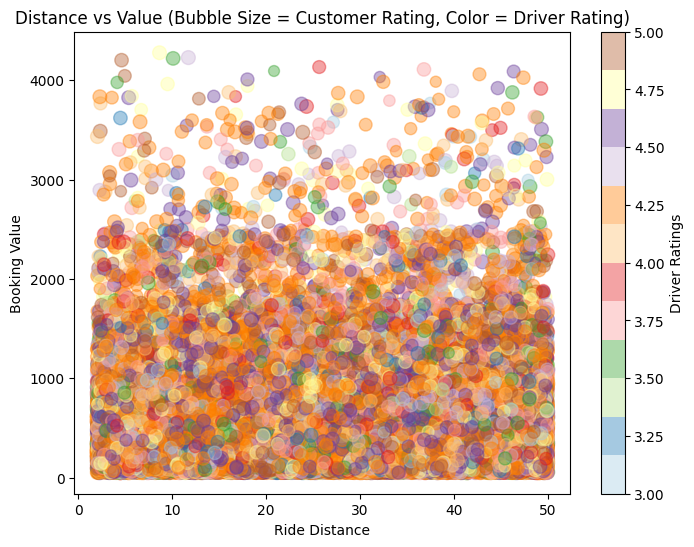

In [40]:
# Bubble Chart – Distance vs Value with Ratings
plt.figure(figsize=(8,6))
plt.scatter(df["Ride Distance"], df["Booking Value"], 
            s=df["Customer Rating"]*20, alpha=0.4, c=df["Driver Ratings"], cmap="Paired")
plt.title("Distance vs Value (Bubble Size = Customer Rating, Color = Driver Rating)")
plt.xlabel("Ride Distance")
plt.ylabel("Booking Value")
plt.colorbar(label="Driver Ratings")
plt.show()